In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# from __future__ import print_function

df_can = pd.read_excel("./files/Canada.xlsx", sheet_name="Canada by Citizenship",
                       skiprows=range(20), skipfooter=2)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))


In [28]:
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis=1)

years = list(map(str, range(1980, 2014)))

/tmp/ipykernel_8566/2762351238.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [29]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


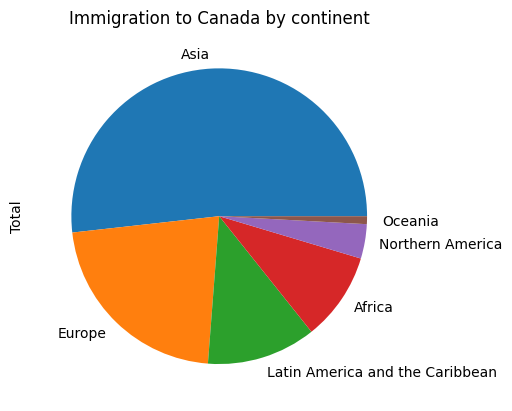

In [30]:
# Pie chart

import matplotlib as mpl

df_continents = df_can.groupby("Continent", axis = 0).sum()
df_continents.sort_values("Total", ascending=False, axis=0, inplace=True)
df_continents["Total"].plot(kind="pie")
plt.title("Immigration to Canada by continent")
plt.show()

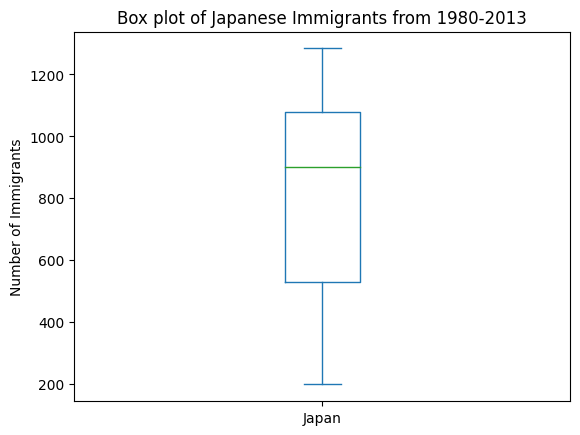

In [31]:
# Box plots charts
df_japan = df_can.loc[["Japan"], years].transpose()
df_japan.plot(kind="box")

plt.title("Box plot of Japanese Immigrants from 1980-2013")
plt.ylabel("Number of Immigrants")
plt.show()

/home/user/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


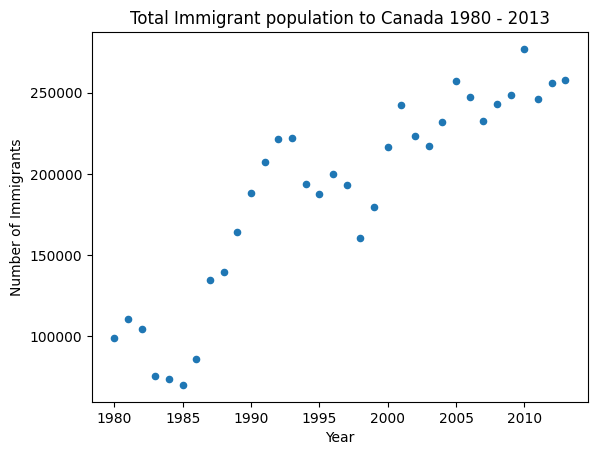

In [32]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.plot(kind="scatter", x="year", y="total")

plt.title("Total Immigrant population to Canada 1980 - 2013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

plt.show()


/home/user/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


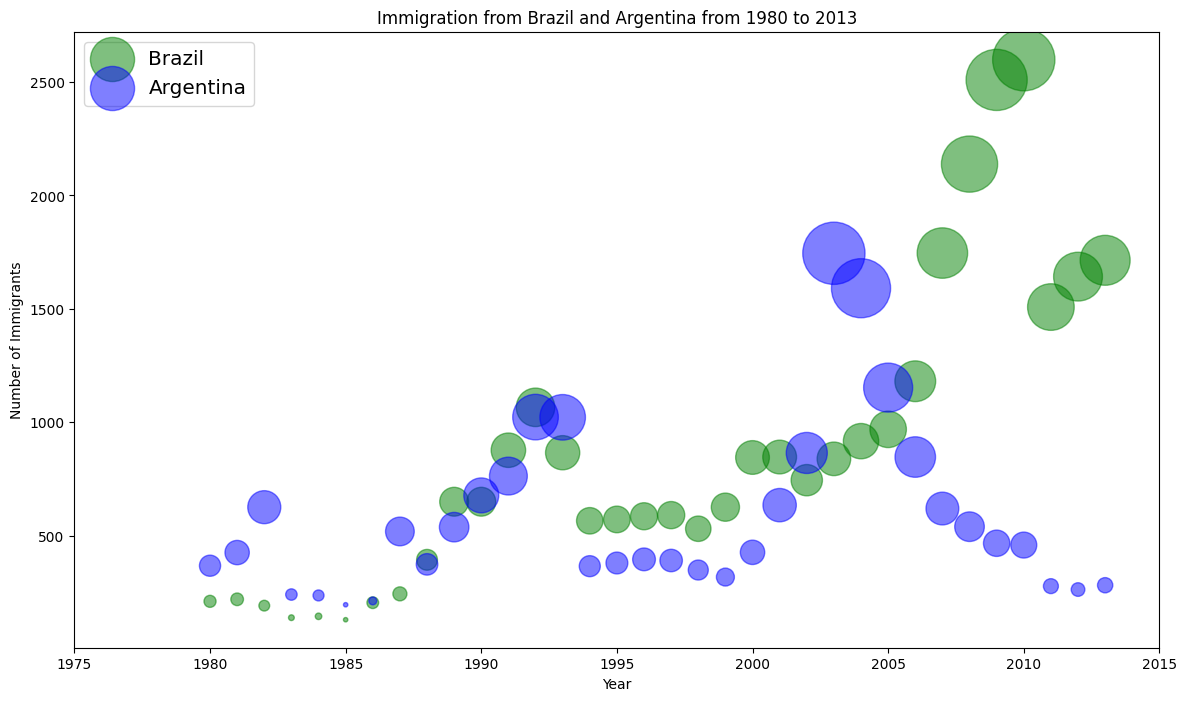

In [33]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

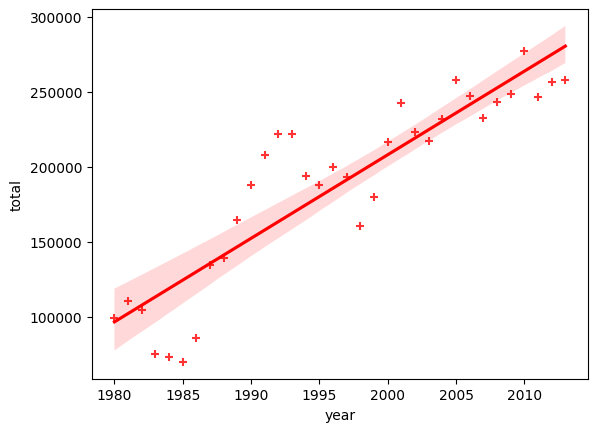

In [38]:
# we can use the sum() method to get the total population per year
from turtle import color


df_tot2 = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot2.index = map(int, df_tot2.index)

# reset the index to put in back in as a column in the df_tot2 dataframe
df_tot2.reset_index(inplace=True)

# rename columns
df_tot2.columns = ['year', 'total']

ax = sns.regplot(x="year", y="total", data=df_tot2, color="red", marker="+")